In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We continue the basic analysis done in notebook 001. In 001, we inspected the data per player. This time, we will inspect it per game.

In [2]:
purchase_data = pd.read_parquet("../dat/steam_purchase.parquet")
play_data = pd.read_parquet("../dat/steam_play.parquet")

In [12]:
playtime_df = play_data.groupby("game", as_index=False).mean().drop(["userId"], axis=1).sort_values(["actionValue"], ascending=False)

In [13]:
purchase_df = purchase_data.groupby("game", as_index=False).count().sort_values(["userId"], ascending=False)

In [14]:
playtime_df

,game,actionValue
1011,Eastside Hockey Manager,1295.000000
285,Baldur's Gate II Enhanced Edition,475.255556
1119,FIFA Manager 09,411.000000
2210,Perpetuum,400.975000
1235,Football Manager 2014,391.984615
...,...,...
1659,Killing Floor Beta,0.100000
1246,Formula Fusion,0.100000
1586,Inside a Star-filled Sky,0.100000
2784,Space Warp,0.100000


In [15]:
purchase_df

,game,userId
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981
...,...,...
1574,EverQuest Seeds of Destruction,1
1576,Everlasting Summer DLC One pioneer's story,1
1577,Everyday Genius SquareLogic,1
1579,EvilQuest,1


In [16]:
playtime_df.actionValue.describe()

count    3600.000000
mean       13.331637
std        39.121551
min         0.100000
25%         1.493651
50%         3.900000
75%        10.758667
max      1295.000000
Name: actionValue, dtype: float64

In [17]:
purchase_df.userId.describe()

count    5155.000000
mean       25.123375
std       101.572586
min         1.000000
25%         2.000000
50%         5.000000
75%        18.000000
max      4841.000000
Name: userId, dtype: float64

We see that an average Steam game is played $13.33$ hours on average, and is owned by $\approx 25$ players.

In [24]:
inner_merge_df = playtime_df.merge(purchase_df, on="game")
outer_merge_df = playtime_df.merge(purchase_df, how="outer", on="game")

In [25]:
inner_merge_df

,game,actionValue,userId
0,Eastside Hockey Manager,1295.000000,1
1,Baldur's Gate II Enhanced Edition,475.255556,17
2,FIFA Manager 09,411.000000,1
3,Perpetuum,400.975000,4
4,Football Manager 2014,391.984615,80
...,...,...,...
3595,Killing Floor Beta,0.100000,1
3596,Formula Fusion,0.100000,1
3597,Inside a Star-filled Sky,0.100000,1
3598,Space Warp,0.100000,1


In [26]:
outer_merge_df

,game,actionValue,userId
0,Eastside Hockey Manager,1295.000000,1
1,Baldur's Gate II Enhanced Edition,475.255556,17
2,FIFA Manager 09,411.000000,1
3,Perpetuum,400.975000,4
4,Football Manager 2014,391.984615,80
...,...,...,...
5150,Siralim,NaN,1
5151,EverQuest II Rise of Kunark,NaN,1
5152,EverQuest II The Shadow Odyssey,NaN,1
5153,Everlasting Summer DLC One pioneer's story,NaN,1


In [29]:
outer_merge_df.userId.isna().sum()

0

It seems some games are bought, but not played. Let's see if any games were bought more than $1$, but never played.

In [31]:
no_play_df = outer_merge_df[outer_merge_df.actionValue.isna()]

In [32]:
no_play_df

,game,actionValue,userId
3600,The Elder Scrolls V Skyrim - Dawnguard,NaN,378
3601,The Elder Scrolls V Skyrim - Hearthfire,NaN,367
3602,The Elder Scrolls V Skyrim - Dragonborn,NaN,365
3603,Sid Meier's Civilization V Brave New World,NaN,241
3604,Skyrim High Resolution Texture Pack,NaN,235
...,...,...,...
5150,Siralim,NaN,1
5151,EverQuest II Rise of Kunark,NaN,1
5152,EverQuest II The Shadow Odyssey,NaN,1
5153,Everlasting Summer DLC One pioneer's story,NaN,1


Just from this table, we can see there are some issues with data collection. The top entries are Downloadable Contents (DLCs) for popular games. It seems they are counted as separate games, however the time spent in the main game using them is not counted in their playtime statistics.

If this data had additional information about the games, it would be so much better.

In [34]:
no_play_df.userId.describe()

count    1555.000000
mean        7.272669
std        24.216585
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       378.000000
Name: userId, dtype: float64

Besides the faulty data collection, it seems a game with no play time is owned by more or less $5$ people at maximum, as third quartile is $5$.

In [36]:
inner_merge_df["hours_per_player"] = inner_merge_df.actionValue / inner_merge_df.userId

In [38]:
inner_merge_df.sort_values("hours_per_player", ascending=False)

,game,actionValue,userId,hours_per_player
0,Eastside Hockey Manager,1295.000000,1,1295.000000
2,FIFA Manager 09,411.000000,1,411.000000
13,Worldwide Soccer Manager 2009,295.000000,1,295.000000
15,NOBUNAGA'S AMBITION Kakushin with Power Up Kit,267.000000,1,267.000000
18,FIFA Manager 11,229.000000,1,229.000000
...,...,...,...,...
3463,Psychonauts Demo,0.200000,82,0.002439
2978,Team Fortress Classic,0.873077,366,0.002385
2900,Ricochet,1.009524,524,0.001927
3040,Deathmatch Classic,0.740625,524,0.001413


From here, it seems that some games have one devoted fan that increases its mean playtime. These can be also considered outliers, or if we think the sample is representative of the real population, we can assume $\approx 1/12393 = \%0.0081$ of the Steam user base were playing these games.

Dataset was last updated 5 years ago, when Steam had a userbase of around $14.37$ million (<a href="https://www.statista.com/statistics/308330/number-stream-users/">Source</a>). So, games that we see only $1$ time here probably had around $100.000$ players.

In [41]:
inner_merge_df.sort_values("hours_per_player", ascending=False)[:10]

,game,actionValue,userId,hours_per_player
0,Eastside Hockey Manager,1295.0,1,1295.0
2,FIFA Manager 09,411.0,1,411.0
13,Worldwide Soccer Manager 2009,295.0,1,295.0
15,NOBUNAGA'S AMBITION Kakushin with Power Up Kit,267.0,1,267.0
18,FIFA Manager 11,229.0,1,229.0
27,Cultures - Northland,194.0,1,194.0
40,Movie Studio 13 Platinum - Steam Powered,166.0,1,166.0
9,Out of the Park Baseball 16,330.4,2,165.2
41,Stargate Resistance,162.0,1,162.0
57,Distant Worlds Universe,132.0,1,132.0


In [42]:
inner_merge_df.sort_values("hours_per_player", ascending=True)[:10]

,game,actionValue,userId,hours_per_player
2891,Half-Life 2 Lost Coast,1.041808,981,0.001062
3040,Deathmatch Classic,0.740625,524,0.001413
2900,Ricochet,1.009524,524,0.001927
2978,Team Fortress Classic,0.873077,366,0.002385
3463,Psychonauts Demo,0.200000,82,0.002439
3035,Half-Life Deathmatch Source,0.750000,268,0.002799
3421,The Ship Tutorial,0.271429,85,0.003193
3559,Realms of the Haunting,0.100000,30,0.003333
3446,Arma 2 British Armed Forces,0.233333,48,0.004861
3503,Serious Sam Classics Revolution,0.200000,37,0.005405


### Hypothesis Testing

Here, we see the games that are played the most and least. It seems that "niche" games tend to be played a lot more than "popular" games on the platform. To verify if this is true, let's say niche games are the games which fall under the first quartile range and popular games are the games that are over the third quartile.

Then, games with $userId \leq 2$ are considered **niche** while games with $userId \geq 18$ are considered **popular**.

In [43]:
niche_games = inner_merge_df[inner_merge_df.userId <= 2]
popular_games = inner_merge_df[inner_merge_df.userId >= 18]

In [44]:
niche_games

,game,actionValue,userId,hours_per_player
0,Eastside Hockey Manager,1295.0,1,1295.0
2,FIFA Manager 09,411.0,1,411.0
9,Out of the Park Baseball 16,330.4,2,165.2
13,Worldwide Soccer Manager 2009,295.0,1,295.0
15,NOBUNAGA'S AMBITION Kakushin with Power Up Kit,267.0,1,267.0
...,...,...,...,...
3594,Urizen Shadows of the Cold,0.1,1,0.1
3595,Killing Floor Beta,0.1,1,0.1
3596,Formula Fusion,0.1,1,0.1
3597,Inside a Star-filled Sky,0.1,1,0.1


In [45]:
popular_games

,game,actionValue,userId,hours_per_player
4,Football Manager 2014,391.984615,80,4.899808
5,Football Manager 2012,390.453165,80,4.880665
6,Football Manager 2010,375.048571,38,9.869699
7,Football Manager 2011,365.703226,34,10.755977
10,Football Manager 2015,315.364935,79,3.991961
...,...,...,...,...
3514,English Country Tune,0.200000,19,0.010526
3533,Chaos Domain,0.166667,30,0.005556
3538,The Banner Saga Factions,0.150000,23,0.006522
3543,PAYDAY The Web Series - Episode 1,0.133333,20,0.006667


In [46]:
popular_games.hours_per_player.describe()

count    1182.000000
mean        0.353471
std         0.866916
min         0.001062
25%         0.058093
50%         0.132951
75%         0.308822
max        12.033636
Name: hours_per_player, dtype: float64

In [47]:
niche_games.hours_per_player.describe()

count     862.000000
mean        9.588631
std        51.674817
min         0.050000
25%         0.506250
50%         1.762500
75%         4.987500
max      1295.000000
Name: hours_per_player, dtype: float64

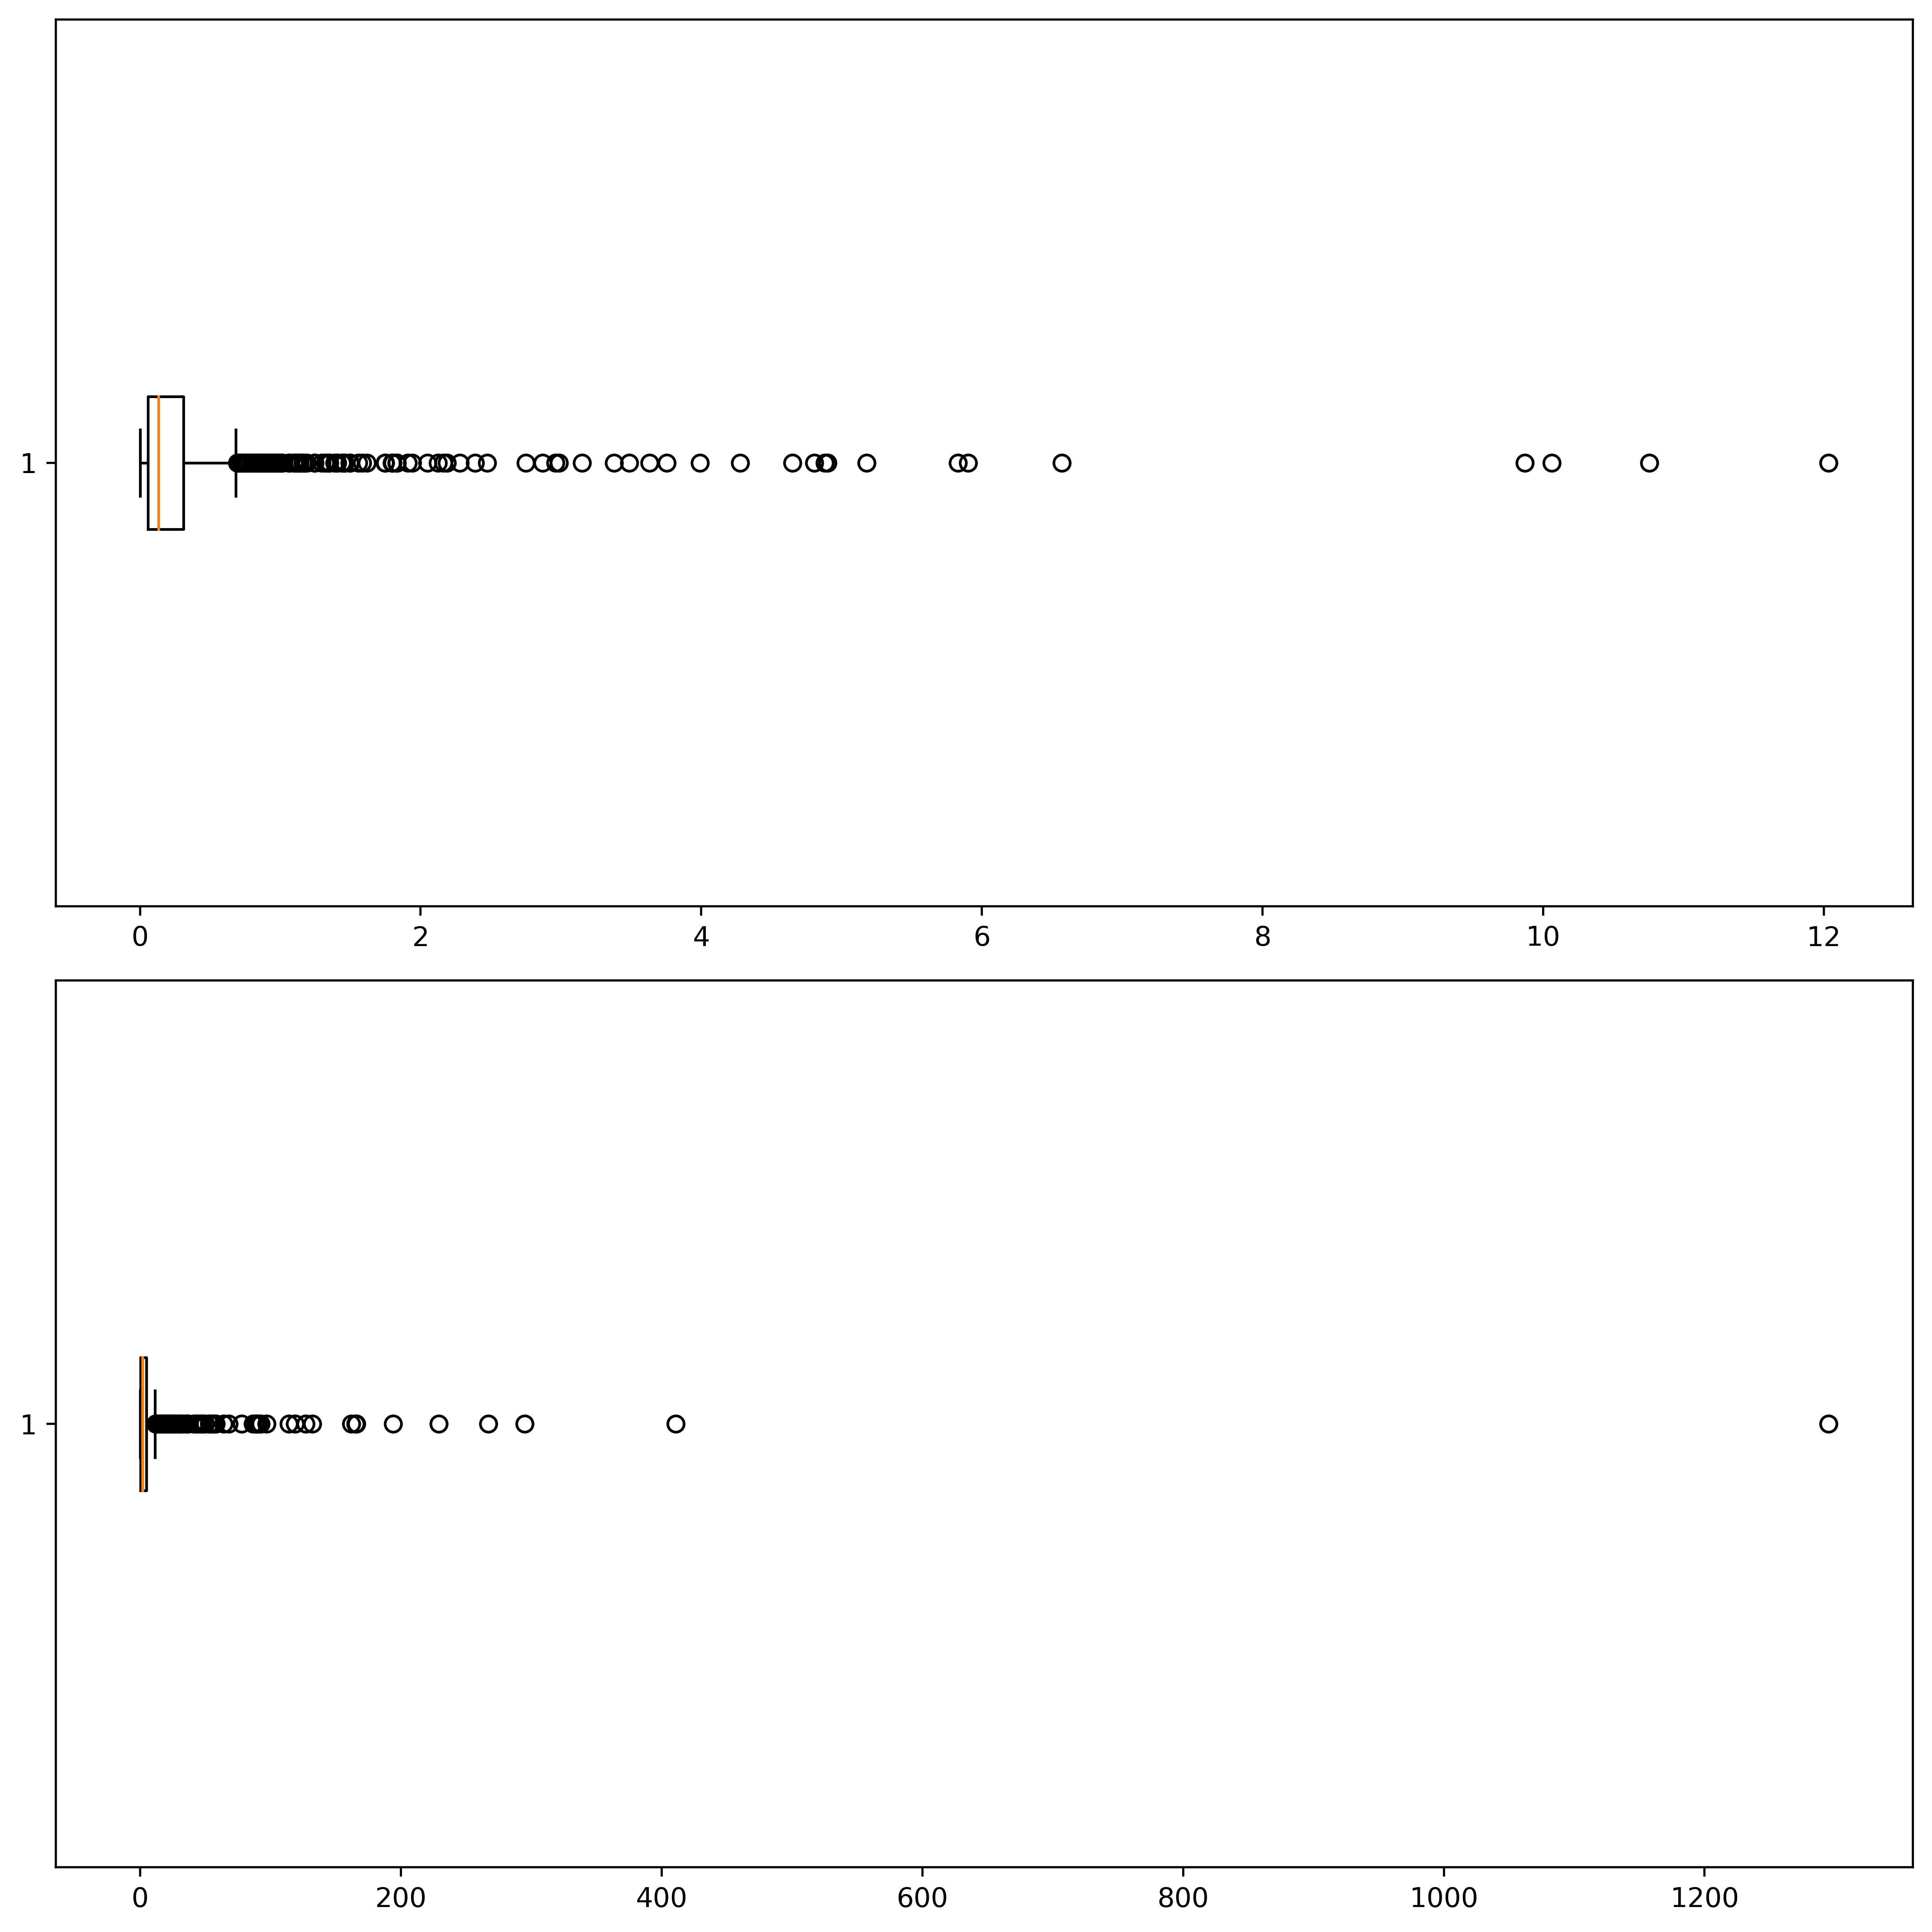

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), dpi=500)

ax[0].boxplot(popular_games.hours_per_player, vert=False)
ax[1].boxplot(niche_games.hours_per_player, vert=False)

fig.tight_layout()
plt.show()

From the plots, it seems that our hypothesis were correct.

Here, we can use hypothesis testing.

$H_0$: Play times for niche games and popular games are coming from the same distribution.

#### Histogram of Playtimes for Visual Comparison